In [9]:
import numpy as np
import EarlyStopping as es
import matplotlib.pyplot as plt

def power_iteration(A, num_iterations: int = 1000, tolerance: float = 1e-10):
    n = A.shape[0]
    # Start with a random vector
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)

    for _ in range(num_iterations):
        # Multiply by the matrix
        w = np.dot(A, v)
        # Normalize to get the next eigenvector approximation
        w_norm = np.linalg.norm(w)
        v_next = w / w_norm

        # Check for convergence
        if np.linalg.norm(v - v_next) < tolerance:
            break

        v = v_next

    # Use the Rayleigh quotient to approximate the eigenvalue
    largest_eigenvalue = np.dot(v.T, np.dot(A, v)) / np.dot(v.T, v)
    return largest_eigenvalue

D = 1000
normal_matrix = np.random.normal(0, 0.1, size=(1000, 1000))
indices = np.arange(D) + 1
indices = np.arange(1, D + 1)
diagonal_values = 1 / np.sqrt(indices)
np.fill_diagonal(normal_matrix, diagonal_values)
design_matrix = normal_matrix

NOISE_LEVEL = 0.1
noise = np.random.normal(0, NOISE_LEVEL, D)
indices = np.arange(D) + 1
signal_supersmooth = 5 * np.exp(-0.1 * indices)
response = noise + design_matrix @ signal_supersmooth
max_iter = 2000

model = es.Landweber(design_matrix, response, learning_rate = 0.01 , true_signal=signal_supersmooth, true_noise_level=NOISE_LEVEL)

model.iterate(max_iter)


In [10]:
# Stopping index
m = model.early_stopping_index

# Weak balanced oracle
weak_oracle = model.weak_balanced_oracle

# Strong balanced oracle
strong_oracle = model.strong_balanced_oracle

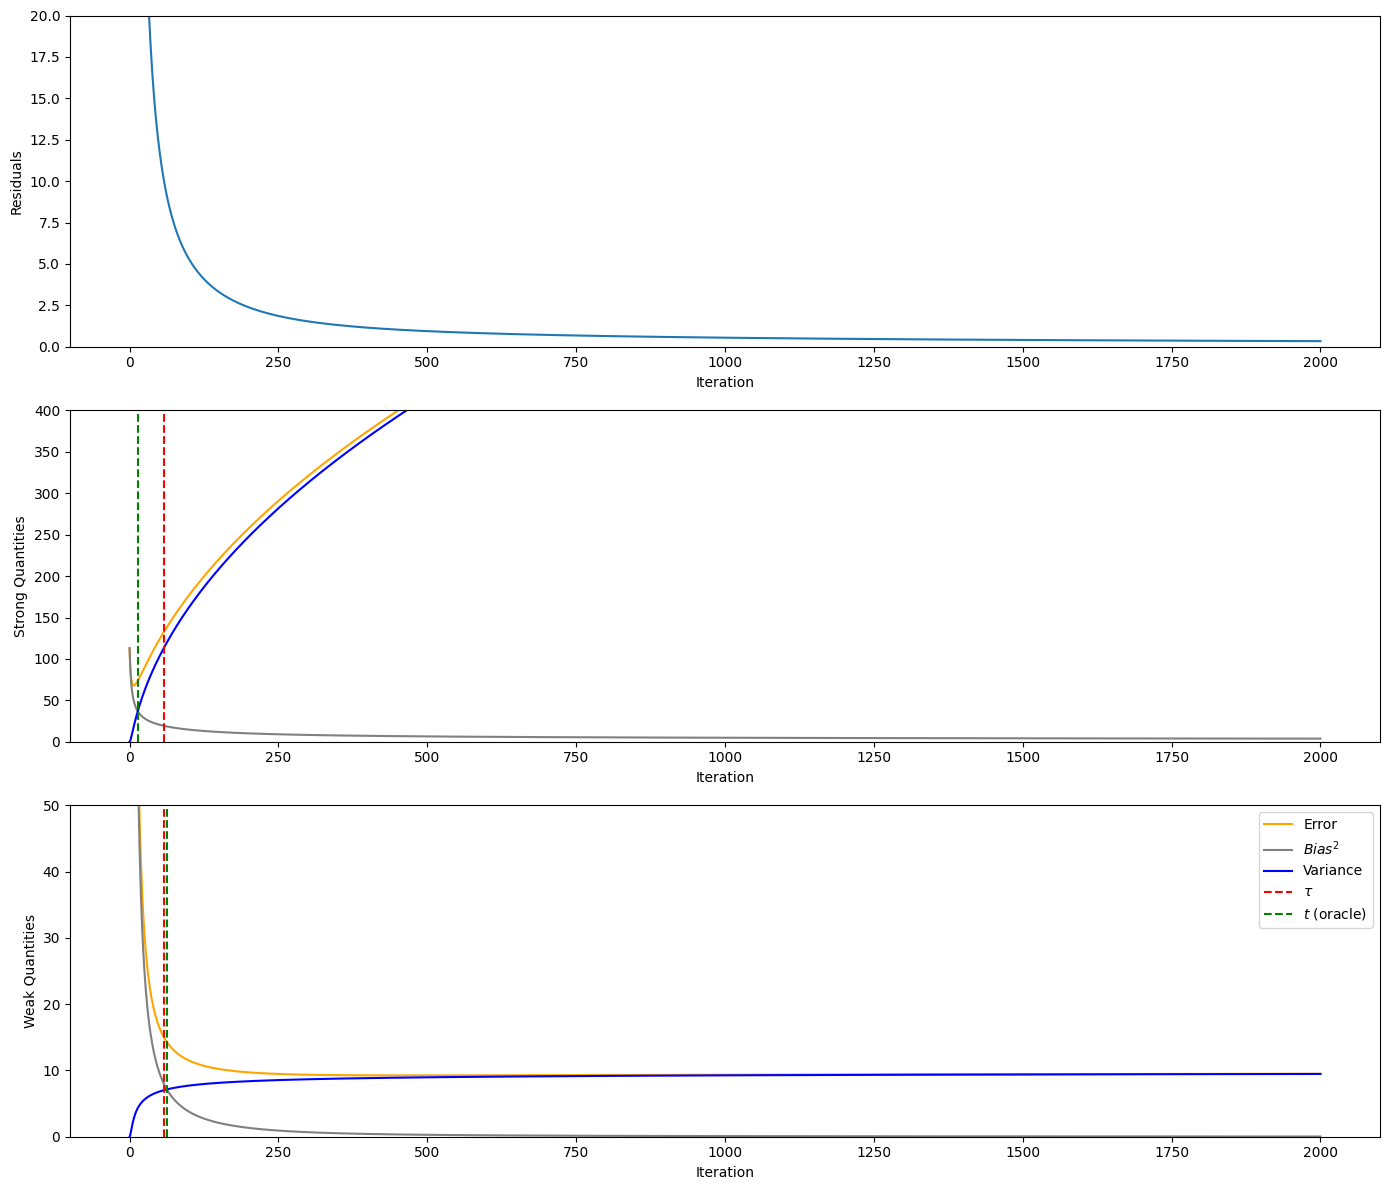

In [15]:

fig, axs = plt.subplots(3, 1, figsize=(14, 12))


axs[0].plot(range(0, max_iter + 1), model.residuals)
# axs[0].axvline(x=m, color="red", linestyle="--")
# axs[0].set_xlim([0, 50])
axs[0].set_ylim([0, 20])
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Residuals")


axs[1].plot(range(0, max_iter + 1), model.strong_error, color="orange", label="Error")
axs[1].plot(range(0, max_iter + 1), model.strong_bias2, label="$Bias^2$", color="grey")
axs[1].plot(range(0, max_iter + 1), model.strong_variance, label="Variance", color="blue")
axs[1].axvline(x=m, color="red", linestyle="--")
axs[1].axvline(x=strong_oracle, color="green", linestyle="--")
# axs[1].set_xlim([0, 50])
axs[1].set_ylim([0, 400])
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Strong Quantities")

axs[2].plot(range(0, max_iter + 1), model.weak_error, color="orange", label="Error")
axs[2].plot(range(0, max_iter + 1), model.weak_bias2, label="$Bias^2$", color="grey")
axs[2].plot(range(0, max_iter + 1), model.weak_variance, label="Variance", color="blue")
axs[2].axvline(x=m, color="red", linestyle="--", label=r"$\tau$")
axs[2].axvline(x=weak_oracle, color="green", linestyle="--", label="$t$ (oracle)")
# axs[2].set_xlim([0, 400])
axs[2].set_ylim([0, 50])
axs[2].set_xlabel("Iteration")
axs[2].set_ylabel("Weak Quantities")
axs[2].legend()

plt.tight_layout()

plt.show()
